In [2]:
!pip install numpy==1.23.5 --force-reinstall
!pip install --upgrade scipy
!pip install --upgrade gensim scikit-learn matplotlib

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.

  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.6 MB)
^C
^C


Loading pretrained Word2Vec model...
[==================================================] 100.0% 1662.8/1662.8MB downloaded


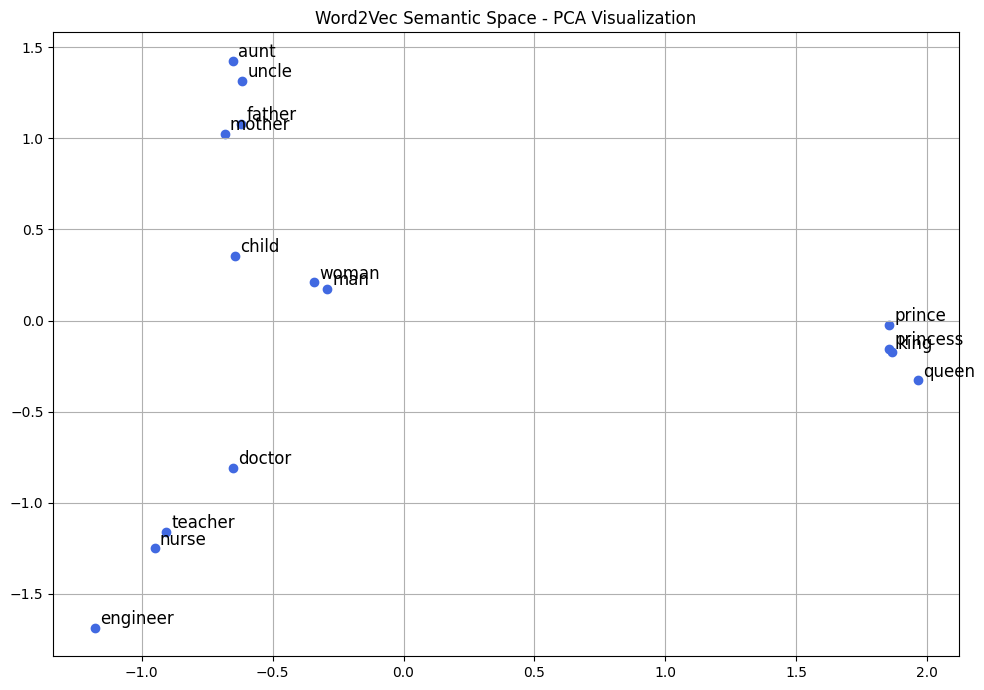


Most similar to 'engineer':
[('electrical_engineer', 0.7500534653663635), ('mechanical_engineer', 0.7456685304641724), ('Engineer', 0.6911254525184631), ('engineering', 0.6766180396080017), ('engineeer', 0.611038863658905), ('engineers', 0.6096685528755188), ('technician', 0.6021502614021301), ('electrician', 0.5883190631866455), ('Mechanical_Engineer', 0.5782192945480347), ('architect', 0.5779430270195007)]

Similarity between 'king' and 'queen': 0.6510957
Similarity between 'doctor' and 'nurse': 0.63195235


In [1]:
import gensim.downloader as api
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

print("Loading pretrained Word2Vec model...")
model = api.load("word2vec-google-news-300")  # ~1.6GB - downloads once, then cached

words = ['king', 'queen', 'man', 'woman', 'doctor', 'nurse', 'engineer', 'teacher',
         'prince', 'princess', 'child', 'mother', 'father', 'uncle', 'aunt']

word_vectors = [model[word] for word in words]

pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 7))
for i, word in enumerate(words):
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1], color='royalblue')
    plt.text(vectors_2d[i, 0]+0.02, vectors_2d[i, 1]+0.02, word, fontsize=12)
plt.title('Word2Vec Semantic Space - PCA Visualization')
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nMost similar to 'engineer':")
print(model.most_similar('engineer'))

print("\nSimilarity between 'king' and 'queen':", model.similarity('king', 'queen'))
print("Similarity between 'doctor' and 'nurse':", model.similarity('doctor', 'nurse'))

In [3]:
import gensim.downloader as api
from sklearn.decomposition import PCA
import plotly.graph_objs as go

print("Loading pretrained Word2Vec model...")
model = api.load("word2vec-google-news-300")
words = ['king', 'queen', 'man', 'woman', 'doctor', 'nurse', 'engineer', 'teacher',
         'prince', 'princess', 'child', 'mother', 'father', 'uncle', 'aunt']

word_vectors = [model[word] for word in words]

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
vectors_3d = pca.fit_transform(word_vectors)

trace = go.Scatter3d(
    x=vectors_3d[:, 0],
    y=vectors_3d[:, 1],
    z=vectors_3d[:, 2],
    mode='markers+text',
    marker=dict(size=6, color='skyblue'),
    text=words,
    textposition='top center'
)

layout = go.Layout(
    title='Interactive 3D Word2Vec Embedding Visualization (PCA)',
    scene=dict(
        xaxis_title='PCA 1',
        yaxis_title='PCA 2',
        zaxis_title='PCA 3'
    ),
    margin=dict(l=0, r=0, b=0, t=50)
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()

Loading pretrained Word2Vec model...


In [5]:
import gensim.downloader as api
from sklearn.decomposition import PCA
import plotly.graph_objs as go
import numpy as np

print("Loading pretrained Word2Vec model...")
model = api.load("word2vec-google-news-300")

words = ['king', 'queen', 'man', 'woman', 'doctor', 'nurse', 'engineer', 'teacher',
         'prince', 'princess', 'child', 'mother', 'father', 'uncle', 'aunt']

word_vectors = np.array([model[word] for word in words])

pca = PCA(n_components=3)
vectors_3d = pca.fit_transform(word_vectors)

trace_words = go.Scatter3d(
    x=vectors_3d[:, 0],
    y=vectors_3d[:, 1],
    z=vectors_3d[:, 2],
    mode='markers+text',
    marker=dict(size=6, color='skyblue'),
    text=words,
    textposition='top center',
    name='Word Vectors'
)

arrow_lines = []
for i in range(len(words)):
    arrow_lines.append(
        go.Scatter3d(
            x=[0, vectors_3d[i, 0]],
            y=[0, vectors_3d[i, 1]],
            z=[0, vectors_3d[i, 2]],
            mode='lines',
            line=dict(color='gray', width=2),
            showlegend=False
        )
    )

data = [trace_words] + arrow_lines

layout = go.Layout(
    title='3D Word2Vec Embedding Visualization with Direction Vectors',
    scene=dict(
        xaxis_title='PCA 1',
        yaxis_title='PCA 2',
        zaxis_title='PCA 3'
    ),
    margin=dict(l=0, r=0, b=0, t=50)
)

fig = go.Figure(data=data, layout=layout)
fig.show()

Loading pretrained Word2Vec model...


In [6]:
import gensim.downloader as api
from sklearn.decomposition import PCA
import plotly.graph_objs as go
import numpy as np

print("Loading the Word2Vec beast...")
model = api.load("word2vec-google-news-300")

words = ['king', 'queen', 'man', 'woman', 'doctor', 'nurse', 'engineer', 'teacher',
         'prince', 'princess', 'child', 'mother', 'father', 'uncle', 'aunt',
         'cat', 'dog', 'car', 'bike']  # Added some wildcards!

word_vectors = np.array([model[word] for word in words])

pca = PCA(n_components=3)
vectors_3d = pca.fit_transform(word_vectors)

similarities = [model.similarity('king', w) for w in words]
colors = [f'rgb({int(255 * s)}, {int(255 * (1 - s))}, 100)' for s in similarities]

trace_words = go.Scatter3d(
    x=vectors_3d[:, 0],
    y=vectors_3d[:, 1],
    z=vectors_3d[:, 2],
    mode='markers+text',
    marker=dict(size=10, color=colors, opacity=0.8, line=dict(width=2, color='white')),
    text=words,
    textposition='top center',
    name='Word Vectors'
)

arrow_lines = []
for i in range(len(words)):
    arrow_lines.append(
        go.Scatter3d(
            x=[0, vectors_3d[i, 0]],
            y=[0, vectors_3d[i, 1]],
            z=[0, vectors_3d[i, 2]],
            mode='lines',
            line=dict(color=colors[i], width=3, dash='dash'),  # Dashed for flair!
            showlegend=False
        )
    )

center = np.mean(vectors_3d, axis=0)
trace_center = go.Scatter3d(
    x=[center[0]], y=[center[1]], z=[center[2]],
    mode='markers+text',
    marker=dict(size=12, color='red', symbol='diamond'),
    text=['Semantic Core'],
    textposition='bottom center',
    name='Center'
)

data = [trace_words, trace_center] + arrow_lines

layout = go.Layout(
    title='🚀 3D Word2Vec Galaxy: Vectors, Arrows, and Beyond!',
    scene=dict(
        xaxis_title='PCA 1', yaxis_title='PCA 2', zaxis_title='PCA 3',
        bgcolor='rgba(10, 10, 20, 0.9)',
        xaxis=dict(gridcolor='gray'), yaxis=dict(gridcolor='gray'), zaxis=dict(gridcolor='gray')
    ),
    margin=dict(l=0, r=0, b=0, t=50),
    paper_bgcolor='black',
    font=dict(color='white')
)

fig = go.Figure(data=data, layout=layout)
fig.show()

Loading the Word2Vec beast...


In [7]:
import gensim.downloader as api
from sklearn.decomposition import PCA
import plotly.graph_objs as go
import numpy as np

print("Loading the Word2Vec beast...")
model = api.load("word2vec-google-news-300")

words = ['king', 'queen', 'man', 'woman', 'doctor', 'nurse', 'engineer', 'teacher',
         'prince', 'princess', 'child', 'mother', 'father', 'uncle', 'aunt',
         'cat', 'dog', 'car', 'bike']

word_vectors = np.array([model[word] for word in words])

pca = PCA(n_components=3)
vectors_3d = pca.fit_transform(word_vectors)

similarities = [model.similarity('king', w) for w in words]
colors = [f'rgb({int(255 * s)}, {int(255 * (1 - s))}, 100)' for s in similarities]

trace_words = go.Scatter3d(
    x=vectors_3d[:, 0],
    y=vectors_3d[:, 1],
    z=vectors_3d[:, 2],
    mode='markers+text',
    marker=dict(size=10, color=colors, opacity=0.8, line=dict(width=2, color='white')),
    text=words,
    textposition='top center',
    name='Word Vectors'
)

arrow_lines = []
for i in range(len(words)):
    arrow_lines.append(
        go.Scatter3d(
            x=[0, vectors_3d[i, 0]],
            y=[0, vectors_3d[i, 1]],
            z=[0, vectors_3d[i, 2]],
            mode='lines',
            line=dict(color=colors[i], width=3, dash='dash'),
            showlegend=False
        )
    )

center = np.mean(vectors_3d, axis=0)
trace_center = go.Scatter3d(
    x=[center[0]], y=[center[1]], z=[center[2]],
    mode='markers+text',
    marker=dict(size=12, color='red', symbol='diamond'),
    text=['Semantic Core'],
    textposition='bottom center',
    name='Center'
)

data = [trace_words, trace_center] + arrow_lines

layout = go.Layout(
    title='🚀 3D Word2Vec Galaxy: Vectors, Arrows, and Beyond!',
    scene=dict(
        xaxis_title='PCA 1', yaxis_title='PCA 2', zaxis_title='PCA 3',
        bgcolor='rgba(230, 240, 250, 0.9)',
        xaxis=dict(gridcolor='gray'), yaxis=dict(gridcolor='gray'), zaxis=dict(gridcolor='gray')
    ),
    margin=dict(l=0, r=0, b=0, t=50),
    paper_bgcolor='rgba(230, 240, 250, 0.9)',
    font=dict(color='black')
)

fig = go.Figure(data=data, layout=layout)
fig.show()

Loading the Word2Vec beast...
